In [2]:
import os 
print("Current Working Directory:", os.getcwd())

Current Working Directory: c:\Users\mtthi\OneDrive\Desktop\Spotify Extended Streaming History


In [3]:
import pandas as pd

file_path = '2011-2013_Streaming.json'
data = pd.read_json(file_path)

#Display the first few rows 
print(data.head())

#Display general info about the Data to check for missing values and data types
print(data.info())



                     ts                                 platform  ms_played  \
0  2011-07-21T19:05:15Z  Windows 7 (Home Premium Ed) SP0 [x86 0]       5100   
1  2011-07-21T19:06:05Z  Windows 7 (Home Premium Ed) SP0 [x86 0]      50367   
2  2011-07-21T19:07:05Z  Windows 7 (Home Premium Ed) SP0 [x86 0]      60229   
3  2011-07-21T19:11:28Z  Windows 7 (Home Premium Ed) SP0 [x86 0]     263356   
4  2011-07-21T19:15:16Z  Windows 7 (Home Premium Ed) SP0 [x86 0]     227691   

  conn_country       ip_addr master_metadata_track_name  \
0           US  70.89.167.73            Bitch Came Back   
1           US  70.89.167.73                    Lowlife   
2           US  70.89.167.73             Lonely Lullaby   
3           US  70.89.167.73          Party Rock Anthem   
4           US  70.89.167.73        Rolling in the Deep   

  master_metadata_album_artist_name master_metadata_album_album_name  \
0               Theory of a Deadman                  The Truth Is...   
1               Theory of 

In [4]:
#Convert 'ts' to datetime
data['ts'] = pd.to_datetime(data['ts'])

#Filter for the year 2011
data_2011 = data[data['ts'].dt.year == 2011]

# Group by track name and artist name, then count occurences, then sort descending
top_songs_2011 = data_2011.groupby(['master_metadata_track_name', 'master_metadata_album_artist_name', 'master_metadata_album_album_name']).size().sort_values(ascending=False)

# Display the top 10 songs
print(top_songs_2011.head(10))

master_metadata_track_name  master_metadata_album_artist_name  master_metadata_album_album_name              
Rolling in the Deep         Adele                              Rolling In The Deep                               14
Someone Like You            Lucy                               Jekyll & Hyde                                     14
Love You Like A Love Song   Selena Gomez & The Scene           When The Sun Goes Down                            14
First Of The Gang           Zee Avi                            Zee Avi                                           14
No Christmas For Me         Zee Avi                            This Warm December: Brushfire Holiday's Vol. 1    14
Darling                     Zee Avi                            Zee Avi                                           13
Super Bass                  Nicki Minaj                        Pink Friday                                       12
Intro                       Big Sean                           Finally Famous 

In [5]:
# Check how many plays i have

total_plays_2011 = len(data_2011)
print(f"Total Plays: {total_plays_2011}")

Total Plays: 3185


<center>
<img src="1.png" style='width: 25%'/> <img src="2.png" style='width: 25%'/> <img src="3.png" style='width: 25%'/>


<img src='topsongs2011_opt2.png' style='width: 25%'/>


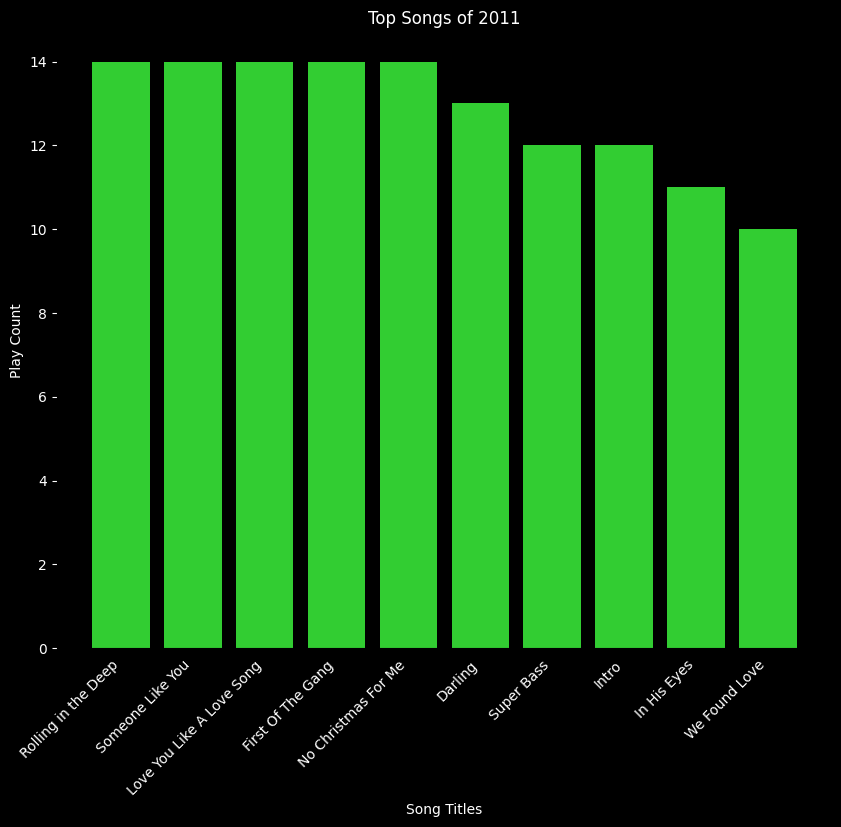

In [6]:

import matplotlib.pyplot as plt

# Prepare the plot data
top_songs_plot = top_songs_2011.head(10)

# Create the plot
fig, ax = plt.subplots(figsize=(10,8)) # Adjustable size
ax.bar(top_songs_plot.index.get_level_values('master_metadata_track_name'), top_songs_plot.values, color='limegreen')

# Customize the plot
ax.set_facecolor('black') # Set background color of axes
fig.patch.set_facecolor('black') # Set the background color of the figure

# Set title and labels
ax.set_title('Top Songs of 2011', color='white')
ax.set_xlabel('Song Titles', color='white')
ax.set_ylabel('Play Count', color='white')

# Set tick parameters for x and y axis
plt.xticks(rotation=45, ha='right', color='white') # Rotate x-ticks for better readability
ax.tick_params(axis='y', colors='white')



# Show the plot
plt.show()

# Finding the top artists of 2011

In [7]:
# Group data by artist name and count occurrences
top_artists_2011 = data.groupby('master_metadata_album_artist_name').size().sort_values(ascending=False)

# Display the top Artists
print(top_artists_2011.head(20))

master_metadata_album_artist_name
Glee Cast                             1311
Nicki Minaj                            674
One Direction                          487
Britney Spears                         407
The Rocket Summer                      381
Lana Del Rey                           337
Rihanna                                316
Beyoncé                                312
Kelly Clarkson                         303
Demi Lovato                            300
Lorde                                  245
George Balanchine's The Nutcracker     233
Justin Bieber                          231
Miley Cyrus                            225
Jonas Brothers                         218
Madonna                                209
MARINA                                 201
Maroon 5                               200
Katy Perry                             196
Lady Gaga                              195
dtype: int64


In [8]:
# Finding Artist count
distinct_artists_2011 = data_2011['master_metadata_album_artist_name'].nunique()

print(f"Number of Artists Listened to: {distinct_artists_2011}")

Number of Artists Listened to: 715


In [9]:
import plotly.express as px
import pandas as pd

top_artists_df = top_artists_2011.nlargest(5).reset_index()
top_artists_df.columns = ['Artist', 'Play Counts']
top_artists_df = top_artists_df.sort_values('Play Counts', ascending=True)

# Create Horizontal Bar Chart
fig = px.bar(top_artists_df,
             x = 'Play Counts',
             y = 'Artist',
             text = 'Play Counts',
             orientation = 'h',
             title = 'Top Artists of 2011')

# Customizing colors with green scale
colors = px.colors.sequential.Greens[::-1]
fig.update_traces(marker_color=colors[:len(top_artists_df)],
                  marker_line_width=0)


# Enhance Layout
fig.update_layout(plot_bgcolor='black',
                paper_bgcolor='black',
                font_color='white',
                title_font_color='white')

fig.show()

<center>
<img src='4.png' style='width: 25%'> <img src='5.png' style='width: 25%'> <img src='6.png' style='width: 25%'>

<img src='7.png' style='width: 30%'>

<h1> Finding Top Albums of 2011

In [10]:
# Group by album name and artist name, then count occurrences
top_albums_2011 = data_2011.groupby(['master_metadata_album_album_name', 'master_metadata_album_artist_name']).size()

# Calculate the total number of unique albums
total_unique_albums = top_albums_2011.shape[0]

# Sort by the counts in descending order to find the top albums
top_albums_2011 = top_albums_2011.sort_values(ascending=False)

#Display the results
print("Top Albums of 2011: ")
print(top_albums_2011.head(10))
print("\nTotal number of unique albums listened to in 2011: ", total_unique_albums)


Top Albums of 2011: 
master_metadata_album_album_name                                         master_metadata_album_artist_name 
George Balanchine's The Nutcracker - Music From The Original Soundtrack  George Balanchine's The Nutcracker    76
When The Sun Goes Down                                                   Selena Gomez & The Scene              51
Breakaway                                                                Kelly Clarkson                        47
The Collection                                                           Kelly Clarkson                        43
Glee: The Music, The Christmas Album                                     Glee Cast                             38
Unbroken                                                                 Demi Lovato                           37
Christmas Cheers                                                         Straight No Chaser                    36
Dreaming Out Loud                                                        

In [11]:
top_albums_df = top_albums_2011.nlargest(5).reset_index()
top_albums_df.columns = ['Album', 'Artist', 'Play Counts']
top_albums_df = top_albums_df.sort_values('Play Counts', ascending=True)

# Create Horizontal Bar Chart
fig = px.bar(top_albums_df,
             x = 'Play Counts',
             y = 'Album',
             text = 'Play Counts',
             orientation = 'h',
             title = 'Top Albums of 2011')

# Customizing colors with green scale
colors = px.colors.sequential.Greens[::-1]
fig.update_traces(marker_color=colors[:len(top_albums_df)],
                  marker_line_width=0)


# Enhance Layout
fig.update_layout(plot_bgcolor='black',
                paper_bgcolor='black',
                font_color='white',
                title_font_color='white')

fig.show()

<h2> Finding top genres